# Data-Pipelines

## Libraries


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import re
import numpy as np
import squarify 
import calendar
import requests
from bs4 import BeautifulSoup
import pycountry
import country_converter as coco
cc = coco.CountryConverter()

### Functions

In [2]:
import scraper as scr
import api_extract as api

## Context and hypotheses

Other possible variables to consider, not included in this analysis: unemployment rate, gender (in)equality

Hypotheses:
1. Air pollution affects happiness index (the more pollution, less happiness)
2. Access to education, measured in literacy rate and shooling years, equally contributes to foster happier societies 
3. Population size might also play a role in happines
4. World unhappier 2020-2021 as a consequence of the COVID-19 pandemic

## Data Collection Process

### Original Dataset from Kaggle

https://www.kaggle.com/datasets/mayzannilarthein44/world-happiness-report-2015-to-2022

--> Compilation and aggregation of the yearly reports by user MAY ZAN NILAR THEIN

In [3]:
## Objetivo: Descargar un datset y enriqucerlo con api y web spcraping

World happiness report 2015-2022 (AUTHORS, LITTLE EXPLANATION REPORT AND DATASET, IN WHICH CHAPTER THEY USE DATASET, MAYBE SHOW ORIGINAL GRAPHS FROM REPORT
--> stuty happiest/least happy countries relate with pollution around the world. 
Web scraping of https://worldpopulationreview.com/country-rankings/most-polluted-countries 

In [4]:
df = pd.read_csv("../input/world-happiness-report-2015-2022-cleaned.csv")

In [5]:
df

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,142,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


In [6]:
# Replace so the country column will look more alike to the 'country' cols in the other datasets
df['Country'] = df['Country'].str.replace("*", "")

/var/folders/_3/sh9lq8cx353bw8jn9pybzhn00000gn/T/ipykernel_95732/3278782635.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Country'] = df['Country'].str.replace("*", "")


### IQ Air Web scraping

In [7]:
## Web scraping to obtain air pollution by country
# Website = https://www.iqair.com/world-most-polluted-countries
# table = Most polluted country and region ranking based on annual average PM2.5 concentration (μg/m³)

Find the following columns from the website:
- Rank
- Country/Region	
- 2018		
- 2019	
- 2020	
- 2021
- Population

In [8]:
pollution = scr.scrape_iqair()

In [9]:
pollution

,Country,Population,Year,Pollution
0,Bangladesh,"164,689,383",2018,97.1
1,Chad,"16,425,859",2018,-
2,Pakistan,"220,892,331",2018,74.3
3,Tajikistan,"9,537,642",2018,-
4,India,"1,380,004,385",2018,72.5
...,...,...,...,...
463,"Bonaire, Saint Eustatius and Saba","26,221",2021,5.1
464,Cape Verde,"555,988",2021,5.1
465,Puerto Rico,"2,860,840",2021,4.8
466,U.S. Virgin Islands,"104,423",2021,4.5


###  World Bank Indicators API (QUEDA PENDIENTE)


The World Bank Indicators API provides access to nearly 16,000 time series indicators. Most of these indicators are available online through tools such as Databank and the Open Data website. The API provides programmatic access to this same data. Many data series date back over 50 years, and can be used to create interesting applications.
The Indicators API provides access to over 45 databases and no authentication method is required to access the API.

**URL usage**

The basic url for the v2 API version of the World Bank Indicators is `http://api.worldbank.org/v2/country/all/indicator/indicator_code` where indicator_code has to be replaced by the id of the indicator to extract data for.

The API supports query string on the url, and the following ones have been used:
- format:  output format of the request. Json format is choosed
- date: date range of the API request. From 2015 to 2022 as in the source data.
- per_page: number of results per page. Length on the longest response.

In [10]:
#Education: Mean years of schooling (ISCED 1 or higher), population 25+ years, both sexes
schooling_years = api.worldbank_indicator(indicator_name='Avg. Schooling Years', indicator_code='UIS.EA.MEAN.1T6.AG25T99')

In [11]:
schooling_years

,Country code,Country,Year,Avg. Schooling Years
0,,Global Partnership for Education,2100,NaN
1,,Global Partnership for Education,2095,NaN
2,,Global Partnership for Education,2090,NaN
3,,Global Partnership for Education,2085,NaN
4,,Global Partnership for Education,2080,NaN
...,...,...,...,...
5891,ZW,Zimbabwe,2019,NaN
5892,ZW,Zimbabwe,2018,NaN
5893,ZW,Zimbabwe,2017,8.4668
5894,ZW,Zimbabwe,2016,NaN


In [12]:
# Our range of years goes from 2015 to 2022, as in the original dataset. Therefore, I clean all the values 
# over that threshold
# schooling_years = schooling_years.drop(schooling_years[schooling_years.Year > 2022].index, inplace=True)

In [13]:
#Literacy rate, adult total (% of people ages 15 and above) - SE.ADT.LITR.ZS
literacy = api.worldbank_indicator(indicator_name='Literacy Rate', indicator_code='SE.ADT.LITR.ZS')

In [14]:
literacy

,Country code,Country,Year,Literacy Rate
0,ZH,Africa Eastern and Southern,2021,NaN
1,ZH,Africa Eastern and Southern,2020,NaN
2,ZH,Africa Eastern and Southern,2019,NaN
3,ZH,Africa Eastern and Southern,2018,NaN
4,ZH,Africa Eastern and Southern,2017,NaN
...,...,...,...,...
1857,ZW,Zimbabwe,2019,NaN
1858,ZW,Zimbabwe,2018,NaN
1859,ZW,Zimbabwe,2017,NaN
1860,ZW,Zimbabwe,2016,NaN


### Merging datasets

In [15]:
# They will all be left joins 

In [16]:
# df - pollution - schooling_years - literacy

**Try to merge df with API**

In [17]:
# Checks similar values, in order to get more matching countries
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_2
    except:
        return np.nan

In [18]:
# Preparaing the data to optimize the merge 
df["Country code"] = df["Country"].apply(lambda country: do_fuzzy_search(country))
pollution["Country code"] = pollution["Country"].apply(lambda country: do_fuzzy_search(country))
pollution['Year'] = pollution['Year'].astype(int)
literacy['Year'] = literacy['Year'].astype(int)
schooling_years['Year'] = schooling_years['Year'].astype(int)

In [19]:
# Left merge 
df = pd.merge(df, literacy, on=["Year", "Country code"], how="left")
df = pd.merge(df, schooling_years, on=["Year", "Country code"], how="left")
df = pd.merge(df, pollution, on=["Year", "Country code"], how="left")

/var/folders/_3/sh9lq8cx353bw8jn9pybzhn00000gn/T/ipykernel_95732/3702547816.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df, pollution, on=["Year", "Country code"], how="left")


In [20]:
df

,Unnamed: 0,Happiness Rank,Country_x,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Country code,Country_y,Literacy Rate,Country_x,Avg. Schooling Years,Country_y,Population,Pollution
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,CH,Switzerland,NaN,Switzerland,14.00355,NaN,NaN,NaN
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015,IS,Iceland,NaN,Iceland,NaN,NaN,NaN,NaN
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,DK,Denmark,NaN,Denmark,12.60896,NaN,NaN,NaN
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NO,Norway,NaN,Norway,12.77121,NaN,NaN,NaN
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,CA,Canada,NaN,Canada,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,141,142,Botswana,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022,BW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,142,143,Rwanda,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022,RW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1370,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022,ZW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1371,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022,LB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Dropping duplicated cols after mergin, Country code will be the index
df = df.drop(['Unnamed: 0', 'Country_x', 'Country_y'], axis=1)

In [22]:
df

,Happiness Rank,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Country code,Literacy Rate,Avg. Schooling Years,Population,Pollution
0,1,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,CH,NaN,14.00355,NaN,NaN
1,2,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015,IS,NaN,NaN,NaN,NaN
2,3,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,DK,NaN,12.60896,NaN,NaN
3,4,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NO,NaN,12.77121,NaN,NaN
4,5,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,CA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,142,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022,BW,NaN,NaN,NaN,NaN
1369,143,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022,RW,NaN,NaN,NaN,NaN
1370,144,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022,ZW,NaN,NaN,NaN,NaN
1371,145,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022,LB,NaN,NaN,NaN,NaN


### Cleaning of resulting dataframe

In [23]:
df

,Happiness Rank,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Country code,Literacy Rate,Avg. Schooling Years,Population,Pollution
0,1,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,CH,NaN,14.00355,NaN,NaN
1,2,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015,IS,NaN,NaN,NaN,NaN
2,3,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,DK,NaN,12.60896,NaN,NaN
3,4,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NO,NaN,12.77121,NaN,NaN
4,5,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,CA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,142,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022,BW,NaN,NaN,NaN,NaN
1369,143,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022,RW,NaN,NaN,NaN,NaN
1370,144,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022,ZW,NaN,NaN,NaN,NaN
1371,145,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022,LB,NaN,NaN,NaN,NaN


**Change order of the columns, put country code in position 1**

In [24]:
df = df.iloc[:, [10,0,1,2,3,4,5,6,7,8,9,11,12,13,14]]

In [25]:
df

,Country code,Happiness Rank,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Literacy Rate,Avg. Schooling Years,Population,Pollution
0,CH,1,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,NaN,14.00355,NaN,NaN
1,IS,2,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015,NaN,NaN,NaN,NaN
2,DK,3,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,NaN,12.60896,NaN,NaN
3,NO,4,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NaN,12.77121,NaN,NaN
4,CA,5,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,BW,142,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022,NaN,NaN,NaN,NaN
1369,RW,143,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022,NaN,NaN,NaN,NaN
1370,ZW,144,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022,NaN,NaN,NaN,NaN
1371,LB,145,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022,NaN,NaN,NaN,NaN


In [26]:
df['Country code'].isna().sum()

189

**Add country name col with `country_converter()`**

In [27]:
iso2_names = list(df['Country code'])

In [28]:
country_names = cc.convert(names = iso2_names, src = 'ISO2', to = 'name_short')

nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not found in ISO2
nan not fo

In [29]:
country_names

['Switzerland',
 'Iceland',
 'Denmark',
 'Norway',
 'Canada',
 'Finland',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Australia',
 'Israel',
 'Costa Rica',
 'Austria',
 'Mexico',
 'United States',
 'Brazil',
 'Luxembourg',
 'Ireland',
 'Belgium',
 'United Arab Emirates',
 'United Kingdom',
 'Oman',
 'Venezuela',
 'Singapore',
 'Panama',
 'Germany',
 'Chile',
 'Qatar',
 'France',
 'Argentina',
 'Czech Republic',
 'Uruguay',
 'Colombia',
 'Thailand',
 'Saudi Arabia',
 'Spain',
 'Malta',
 'Taiwan',
 'Kuwait',
 'Suriname',
 'Trinidad and Tobago',
 'El Salvador',
 'Guatemala',
 'Uzbekistan',
 'Slovakia',
 'Japan',
 'South Korea',
 'Ecuador',
 'Bahrain',
 'Italy',
 'Bolivia',
 'Moldova',
 'Paraguay',
 'Kazakhstan',
 'Slovenia',
 'Lithuania',
 'Nicaragua',
 'Peru',
 'Belarus',
 'Poland',
 'Malaysia',
 'Croatia',
 'Libya',
 'Russia',
 'Jamaica',
 'not found',
 'Cyprus',
 'Algeria',
 'Serbia',
 'Turkmenistan',
 'Mauritius',
 'Hong Kong',
 'Estonia',
 'Indonesia',
 'Vietnam',
 'Turkey',
 'Kyrgy

In [30]:
# Add new column at the specific position
df.insert(1,'Country', country_names )

**REPLACE "," BY "." IN HAPPINESS SCORE and convert column to type(float)**

In [32]:
df['Happiness Score'] = df['Happiness Score'].str.replace(",", ".")

/var/folders/_3/sh9lq8cx353bw8jn9pybzhn00000gn/T/ipykernel_95732/2014909570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Happiness Score'] = df['Happiness Score'].str.replace(",", ".")


In [33]:
df['Happiness Score'] = df['Happiness Score'].apply(lambda x: float(x) if type(x) == str else x)

/var/folders/_3/sh9lq8cx353bw8jn9pybzhn00000gn/T/ipykernel_95732/1783716424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Happiness Score'] = df['Happiness Score'].apply(lambda x: float(x) if type(x) == str else x)


In [34]:
df

,Country code,Country,Happiness Rank,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Literacy Rate,Avg. Schooling Years,Population,Pollution
0,CH,Switzerland,1,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,NaN,14.00355,NaN,NaN
1,IS,Iceland,2,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015,NaN,NaN,NaN,NaN
2,DK,Denmark,3,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,NaN,12.60896,NaN,NaN
3,NO,Norway,4,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015,NaN,12.77121,NaN,NaN
4,CA,Canada,5,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,BW,Botswana,142,-,3.471,"1,503","0,815","0,280","0,571","0,102","0,012",2022,NaN,NaN,NaN,NaN
1369,RW,Rwanda,143,-,3.268,"0,785","0,133","0,462","0,621","0,544","0,187",2022,NaN,NaN,NaN,NaN
1370,ZW,Zimbabwe,144,Sub-Saharan Africa,2.995,"0,947","0,690","0,270","0,329","0,105","0,106",2022,NaN,NaN,NaN,NaN
1371,LB,Lebanon,145,Middle East and Northern Africa,2.955,"1,392","0,498","0,631","0,103","0,034","0,082",2022,NaN,NaN,NaN,NaN


## Visualization

### Map happines index 2015 - 2022

In [41]:
import plotly.express as px

fig = px.choropleth(df, locations="Country",
                    locationmode="country names",
                    color="Happiness Score", 
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### By region (histogram? barplot?)

### literacy rate v. happiness index

In [36]:
df_literacy = df[df['Literacy Rate'].notna()]


<AxesSubplot:xlabel='Literacy Rate', ylabel='Happiness Score'>

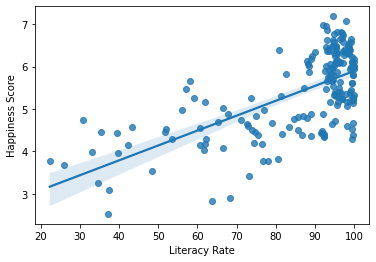

In [37]:
sns.regplot(x="Literacy Rate",
            y="Happiness Score", 
            data=df_literacy)
